In [17]:
import numpy as np
from matplotlib import pyplot as plt
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

In [18]:
"""
        SIR Zombie Model aka Zombie Apocalypse Model

        s'(t) = h - beta*s*z - delta(s)*s
        I'(t) = beta*s*z - ro*I - delta(I)*I
        Z'(t) = ro*I -  alpha*s*z
        D'(t) = delta(s)*s + delta(I)*I + alpha*s*z
    
    
        s'(t): takes into account those who are suseptible to get infected with the zombie virus
            beta:
            s:
            z:
            delta(s):
            h : number of humans we begin with
            beta*s*z : Those infected with zombie virus
            delta(s)*s : Those who are dead/killed
            

            
        I'(t): Takes into account those are infected
        
             ro:
             I:
             beta:
             s:
             z:
             delta(I):
             
            ro*I : Number of infected rate
            beta*s*z : Those infected with zombie virus
            delta(I)*I : When people are killed/dead
             
             
             
    
        Z'(t): Takes into account those are NOW zombies
            ro:
            I
            alpha:
            s:
            z:
            
            ro*I : Number of infected rate
            alpha*s*z : human and zombie interaction. Humans killing zombies
            
  
        D'(t): Those who are dead
            delta(s)
            s
            delta(I)
            I
            alpha
            s
            z
            
            delta(s)*s : Those who are dead/killed
            delta(I)*I : When people are killed/dead
            alpha*s*z : human and zombie interaction. Humans killing zombies
    
        """

"\n        SIR Zombie Model aka Zombie Apocalypse Model\n\n        s'(t) = h - beta*s*z - delta(s)*s\n        I'(t) = beta*s*z - ro*I - delta(I)*I\n        Z'(t) = ro*I -  alpha*s*z\n        D'(t) = delta(s)*s + delta(I)*I + alpha*s*z\n    \n    \n        s'(t): takes into account those who are suseptible to get infected with the zombie virus\n            beta:\n            s:\n            z:\n            delta(s):\n            h : number of humans we begin with\n            beta*s*z : Those infected with zombie virus\n            delta(s)*s : Those who are dead/killed\n            \n\n            \n        I'(t): Takes into account those are infected\n        \n             ro:\n             I:\n             beta:\n             s:\n             z:\n             delta(I):\n             \n            ro*I : Number of infected rate\n            beta*s*z : Those infected with zombie virus\n            delta(I)*I : When people are killed/dead\n             \n             \n             \n 

In [19]:
def solve(f,y0,interval,steps,order):
    """ Solve ODE by Euler or Runge-Kutta methods, with fixed number
    of steps.

    In contrast to the examples of Newman Chapter 8, which build up a
    list, point by point, 
    
    f: function giving ODE as y'=f(x,y)
    y0: initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    order: order of solution method (1 for Euler, 2 or 4 for Runge-Kutta)
    
    Returns (x,y) points, as (steps+1)x2 numpy array.
    """
    (a,b)=interval
    temp = 0
    h=(b - a) / float(steps)
    x=y0
    tpoints= np.arange(a, b, h)
    spoints = []
    ipoints = []
    zpoints = []
    dpoints = []
    qpoints = []
    
    if (order== 1):
        #Using Euler's method
        for t in (tpoints):
            xpoints.append(x)
            x += h * f(x, t)
        func = (tpoints, xpoints)
    if (order == 2):
        for t in (tpoints):
            xpoints.append(x)
            k1 = h* f(x,t)
            k2 = h* f(x+0.5*k1, t+0.5*h)
            x+= k2
        func = (tpoints, xpoints)
    if (order == 4):
        for t in tpoints:
            spoints.append(x[0])
            ipoints.append(x[1])
            zpoints.append(x[2])
            dpoints.append(x[3])
            qpoints.append(x[4])
            k1 = h*f(x,t)
            k2 = h*f(x+0.5*k1,t+0.5*h)
            k3 = h*f(x+0.5*k2,t+0.5*h)
            k4 = h*f(x+k3,t+h)
            x += (k1+2*k2+2*k3+k4)/6

    return (tpoints, spoints, ipoints, zpoints, dpoints, qpoints)

In [20]:
def f(y, t):
    '''Declares all of my functions that are being used in the code
    
    f = a function giving an ODE as y'=f(x,y).  '''
    #initialize
    Si=y[0]
    Ii=y[1]
    Zi=y[2]
    Di=y[3]
    Qi=y[4]
    
    N= Si + Ii + Zi + Di + Qi

    f0= h - beta*Si*Zi - delta_S*Si 
    f1= beta*Si*Zi - ro*Ii - delta_I*Ii-k*Ii
    f2= ro*Ii - alpha*Si*Zi + G*Di-sigma*Zi
    f3= delta_S*Si + delta_I*Ii + alpha*Si*Zi - G*Di+ gamma*Qi
    f4= k*Ii + sigma*Zi - gamma*Qi
    
    return np.array([f0, f1, f2, f3, f4], float)

In [21]:
#desclare rage
interval= [0,8]
steps= 1000

h=20.         #rate at which people coming into the area/birth rate
beta=0.03   #transmission rate
ro =1     #percent of those who are infected become zombies
alpha= 0.2*beta  #probability that human kills zombie
delta_I= 0.0     #probability that an infected human is killed/dies
delta_S= 0.0     #Probability that a human is killed/dies
G=0.06           #probability that a dead individual turns to zombie


#Since we are not taking quarentine into account just yet, they should be 0


k=0.        #rate at which infected people get quarantined
sigma=0.    #rate at which zombie population get quarantined
gamma=0.    #The chance that some members will try to escape and get killed



#initial conditions
S0 = 60.     #initial Population
I0=0.         #Initial infected population
Z0=1.         #initial zombie population
D0=0.         #Initial deaths
Q0=0

y0=[S0, I0, Z0, D0, Q0]

(tp, sp, ip, zp, dp, qp)= solve(f, y0, interval, steps, order=4)


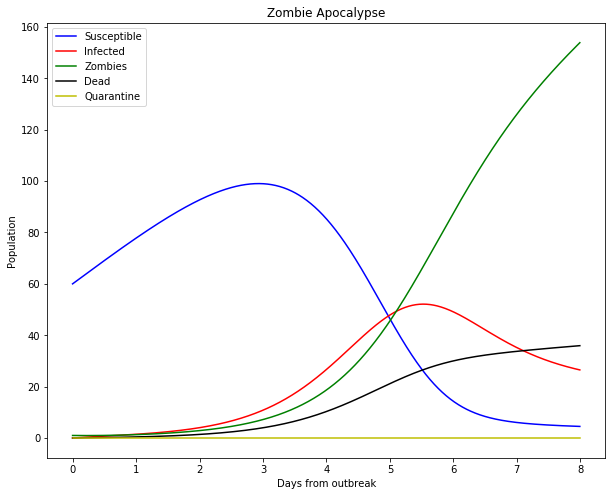

In [22]:

plt.figure()
plt.plot(tp, sp, color='b', label='Susceptible')
plt.plot(tp, ip, color='r', label='Infected')
plt.plot(tp, zp, color='g', label='Zombies')
plt.plot(tp, dp, color='k', label='Dead')
plt.plot(tp, qp, color='y', label='Quarantine')
plt.title('Zombie Apocalypse')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.legend(loc=0)



In [23]:
#desclare rage
interval= [0,15]
steps= 1000

h=0.              #No new people coming in the area
beta=0.0          #No humans get infected
ro =1             #percent of those who are infected become zombies
alpha= 0.006      #Low chance of people getting infected because we are fighting back
delta_I= 0.0      # probability that an infected human is killed/dies
delta_S= 0.0067   #Low probability if those susceptible dying because we are fighting back
G=0.06            #probability that a dead individual turns to zombie

#Since we are not taking quarentine into account just yet, they should be 0


k=0.        #rate at which infected people get quarantined
sigma=0.    #rate at which zombie population get quarantined
gamma= 0.    #The chance that some members will try to escape and get killed


#initial conditions
S0 = 45.     #initial Population
I0=5.         #Initial infected population
Z0=70.         #initial zombie population
D0=0.         #Initial deaths
Q0=0

y0=[S0, I0, Z0, D0, Q0]

(tp, sp, ip, zp, dp, qp)= solve(f, y0, interval, steps, order=4)



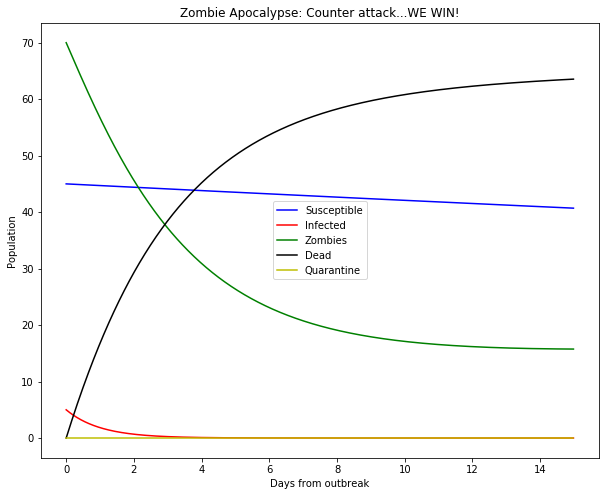

In [24]:
plt.figure()
plt.plot(tp, sp, color='b', label='Susceptible')
plt.plot(tp, ip, color='r', label='Infected')
plt.plot(tp, zp, color='g', label='Zombies')
plt.plot(tp, dp, color='k', label='Dead')
plt.plot(tp, qp, color='y', label='Quarantine')
plt.title('Zombie Apocalypse: Counter attack...WE WIN!')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.legend(loc=0)



Now, what if we got those who are infected and those who are zombies quantined?

In [25]:
#desclare rage
interval= [0,10]
steps= 1000

h=0.              #No new people coming in the area
beta=0.1          #10% of humans get infected
ro =1             #percent of those who are infected become zombies
alpha= 0.006      #Low chance of people getting infected because we are fighting back
delta_I= 0.0      # probability that an infected human is killed/dies
delta_S= 0.0067   #Low probability if those susceptible dying because we are fighting back
G=0.06            #probability that a dead individual turns to zombie

#new constants
k=.6        #rate at which infected people get quarantined
sigma=.2    #rate at which zombie population get quarantined
gamma= .7    #The chance that some members will try to escape and get killed

#initial conditions
S0 = 500.     #initial Population
I0=5.         #Initial infected population
Z0=1.         #initial zombie population
D0=0.         #Initial deaths
Q0=0

y0=[S0, I0, Z0, D0, Q0]

(tp, sp, ip, zp, dp, qp)= solve(f, y0, interval, steps, order=4)




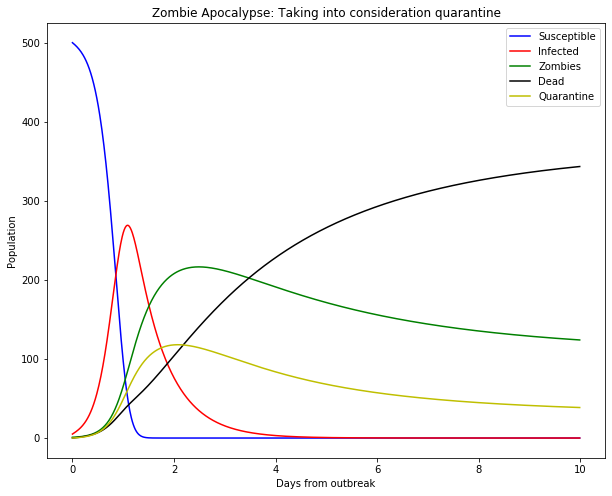

In [26]:
plt.figure()
plt.plot(tp, sp, color='b', label='Susceptible')
plt.plot(tp, ip, color='r', label='Infected')
plt.plot(tp, zp, color='g', label='Zombies')
plt.plot(tp, dp, color='k', label='Dead')
plt.plot(tp, qp, color='y', label='Quarantine')
plt.title('Zombie Apocalypse: Taking into consideration quarantine')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.legend(loc=0)


In [27]:
#desclare rage
interval= [0,20]
steps= 1000

h=0.              #No new people coming in the area
beta=0.01          #1% of humans get infected
ro =1             #percent of those who are infected become zombies
alpha= 0.005      #Low chance of people getting infected because we are fighting back
delta_I= 0.0      #Probability that an infected human is killed/dies
delta_S= 0.0067   #Low probability if those susceptible dying because we are fighting back
G=0.06            #probability that a dead individual turns to zombie
k=.9        #rate at which infected people get quarantined
sigma=.9    #rate at which zombie population get quarantined
gamma= 1    #The chance that some members will try to escape and get killed

#initial conditions
S0 = 500.     #initial Population
I0=5.         #Initial infected population
Z0=1.         #initial zombie population
D0=0.         #Initial deaths
Q0=0          #Initial Quarantined individuals

y0=[S0, I0, Z0, D0, Q0]

(tp, sp, ip, zp, dp, qp)= solve(f, y0, interval, steps, order=4)





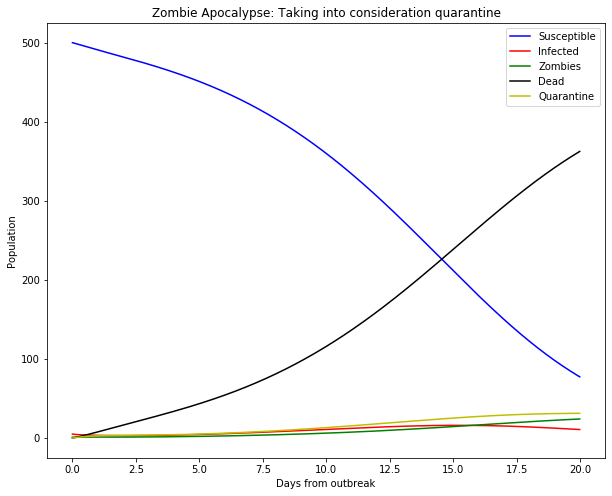

In [28]:
plt.figure()
plt.plot(tp, sp, color='b', label='Susceptible')
plt.plot(tp, ip, color='r', label='Infected')
plt.plot(tp, zp, color='g', label='Zombies')
plt.plot(tp, dp, color='k', label='Dead')
plt.plot(tp, qp, color='y', label='Quarantine')
plt.title('Zombie Apocalypse: Taking into consideration quarantine')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.legend(loc=0)

